## Hospitalizations for repiratory diseases during the Black Summer season

The dataset is produced by the The Australian Institute for Health and Welfare,  Table S4 (Number and crude rate of emergency department presentations, by jurisdiction, SA4, week).


In [1]:
library(pivottabler)
library(IRdisplay)
h.df <- read.csv('./data/aihw/aihw.csv')


In [2]:
pt <- PivotTable$new()
pt$addData(h.df)
pt$addRowDataGroups("sa4_name21", totalCaption="All SA4s")
#pt$addRowDataGroups("week", totalCaption="All Weeks")
pt$defineCalculation(calculationName="NA", caption="N.of Asthma hosp.", 
                     summariseExpression="sum(asth_n_1920, na.rm=TRUE)")
pt$evaluatePivot()
#pt$renderPivot()

## Hospitalisations (2019-09-01 to 2020-02-23)

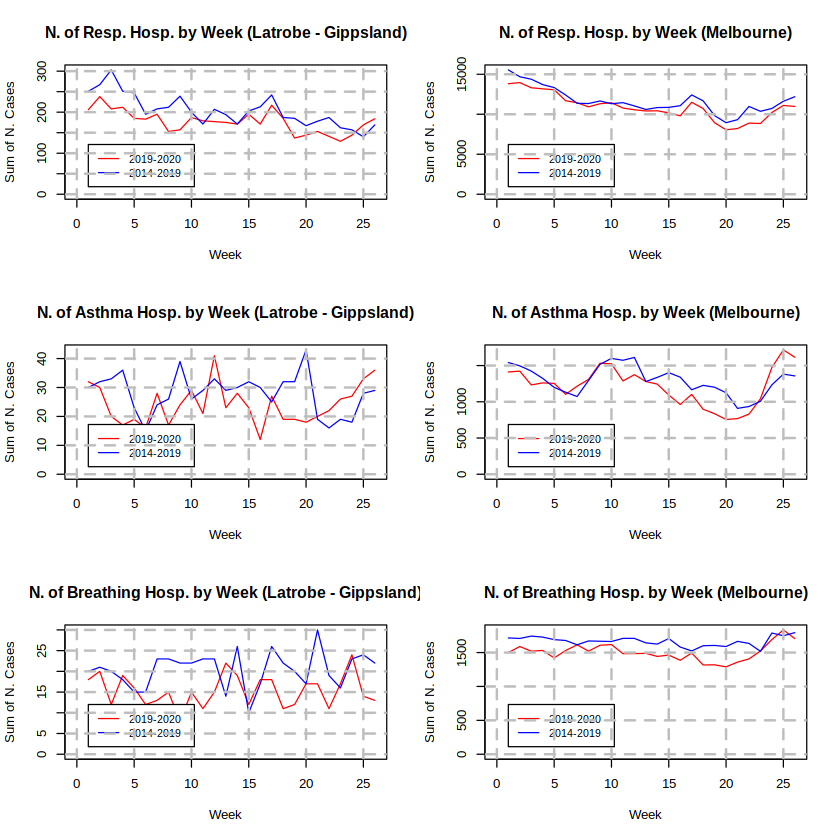

In [3]:
plotHosp <- function (x, title, attr1, attr2) {
  aggr <- aggregate(x[[attr1]], list(x$week), FUN=sum, na.rm=TRUE)
  aggrp <- aggregate(x[[attr2]], list(x$week), FUN=sum, na.rm=TRUE)
  
  plot(aggr$Group.1, aggr$x, main=title, cex=0.2, 
     ylab='Sum of N. Cases', xlab='Week', 
     ylim=c(0, max(max(aggr$x), max(aggrp$x))), xlim=c(0, length(aggr$Group.1)), col='red', type='l')
  lines(aggr$x, col='red')
  lines(aggrp$x, col='blue')
  legend(1, max(max(aggr$x), max(aggrp$x)) * 0.4, legend=c('2019-2020', '2014-2019'), col=c('red', 'blue'), lty=1, cex=0.8)    
  grid(nx = NULL, ny = NULL, lty = 2, col = "gray", lwd = 2)
}

labs <- list('Latrobe - Gippsland', 'Melbourne')
dfs <- list(subset(h.df, sa4_name21 == labs[1]), subset(h.df, grep(labs[2], sa4_name21) > 0))

display_markdown(paste('## Hospitalisations (', substring(min(dfs[[1]]$week), 1, 10), ' to ', substring(max(dfs[[1]]$week), 1, 10), ')', sep=''))
par(mfrow=c(3, 2))
for( i in 1:2) {
  suppressWarnings(plotHosp(dfs[[i]], paste('N. of Resp. Hosp. by Week (', labs[i], ')', sep=''), 'resp_n_1920', 'resp_n_1419'))
}

for( i in 1:2) {
  suppressWarnings(plotHosp(dfs[[i]], paste('N. of Asthma Hosp. by Week (', labs[i], ')', sep=''), 'asth_n_1920', 'asth_n_1419'))
}

for( i in 1:2) {
  suppressWarnings(plotHosp(dfs[[i]], paste('N. of Breathing Hosp. by Week (', labs[i], ')', sep=''), 'bre_n_1920', 'bre_n_1419'))
}


